In [1]:
import pandas as pd
import numpy as np

from nltk.corpus import wordnet
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer



In [2]:
ds=pd.read_csv(r"C:\Users\Cherry\Desktop\KRUPAL\datasets\skytrax-reviews-dataset-e0ca35cc34e504a366ea2e9a972f93852574d7c4\data\airline.csv")

# clean data

In [3]:


# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    

In [4]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)


In [5]:
# clean text data
ds["content_clean"] = ds["content"].apply(lambda x: clean_text(x))

In [6]:
ds.shape

(41396, 6)

In [7]:
ds.head()

,airline_name,content,cabin_flown,overall_rating,type,content_clean
0,adria,Outbound flight FRA/PRN A319. 2 hours 10 min f...,Economy,7.0,1,outbound flight fra/prn hour min flight though...
1,adria,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,Business Class,10.0,1,two short hop zrh-lju lju-vie fast crj seat co...
2,adria,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,Economy,9.0,1,flew zurich-ljubljana newish flight almost ful...
3,adria,Adria serves this 100 min flight from Ljubljan...,Business Class,8.0,1,adria serve min flight ljubljana amsterdam bra...
4,adria,WAW-SKJ Economy.bad bad bad bad bad . not good...,Economy,4.0,0,waw-skj economy.bad bad bad bad bad good.not g...


In [8]:
train_size = int(len(ds) * .95)
train_content = ds['content_clean'][:train_size]
train_type = ds['type'][:train_size]

test_content = ds['content_clean'][train_size:]
test_type = ds['type'][train_size:]

In [9]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [10]:
max_words = 1000
tokenize = Tokenizer(num_words=max_words)

In [11]:
tokenize.fit_on_texts(train_content) # only fit on train

x_train = tokenize.texts_to_matrix(train_content)
x_test = tokenize.texts_to_matrix(test_content)

In [12]:
from keras.utils import to_categorical

In [13]:
train_type_new=to_categorical(train_type)
test_type_new=to_categorical(test_type)

In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
model = Sequential()
model.add(Dense(512, input_shape=(max_words,),activation='relu'))
model.add(Dense(2,activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
history = model.fit(x_train,train_type_new,batch_size=32,epochs=6,verbose=1,validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 35393 samples, validate on 3933 samples
Epoch 1/6
35393/35393 [==============================] - 54s 2ms/step - loss: 0.3534 - acc: 0.8540 - val_loss: 0.2858 - val_acc: 0.8774
Epoch 2/6
35393/35393 [==============================] - 23s 654us/step - loss: 0.2716 - acc: 0.8919 - val_loss: 0.2896 - val_acc: 0.8777
Epoch 3/6
35393/35393 [==============================] - 26s 733us/step - loss: 0.1565 - acc: 0.9442 - val_loss: 0.3361 - val_acc: 0.8670
Epoch 4/6
35393/35393 [==============================] - 26s 726us/step - loss: 0.0481 - acc: 0.9883 - val_loss: 0.4401 - val_acc: 0.8650
Epoch 5/6
35393/35393 [==============================] - 27s 774us/step - loss: 0.0136 - acc: 0.9982 - val_loss: 0.4930 - val_acc: 0.8696
Epoch 6/6
35393/35393 [==============================] - 26s 729us/step - loss: 0.0049 - acc: 0.9997 - val_loss: 0.5648 - val_acc: 0.8683


In [18]:
model.save("airlineR_new.h5")

In [75]:
xtx="outstanding"

In [76]:
new=tokenize.texts_to_matrix([clean_text(xtx)])

In [77]:
n=model.predict(new)[0]

In [78]:
n

array([0.02580342, 0.97419655], dtype=float32)

In [79]:
n=list(n)

In [80]:
n

[0.025803417, 0.97419655]

In [81]:
n1=n.index(max(n))

In [82]:
print(n1)

1


score = model.evaluate(x_test,test_type_new)
print('Test accuracy:', score[1])

In [99]:
from tkinter import *
from keras.models import load_model
import string
import pickle

In [100]:
top = Tk()
top.geometry("650x300+700+550")
top.title("NOOB_MASTER_69")
top.resizable(width=True, height=True)

''

In [101]:
L1 = Label(top, text="Enter Text For Prediction")
L1.pack()
E1 = Entry(top, bd =9)
E1.pack()

In [102]:
def predict1():
    print("Prediction on progress..")
    entered_input=E1.get()
    print("Entered Input",entered_input)
    new=tokenize.texts_to_matrix([clean_text(entered_input)])
    print(entered_input)
    n=model.predict(new)[0]
    n=list(n)
    n1=n.index(max(n))
    print(n1)
    if (n1==1):
        text="The input is a POSITIVE review by user"
    else:
        text="The input is a NEGATIVE review by user"

    L2 = Label(top, text="Prediction: "+text)
    L2.pack()

In [ ]:
B= Button(top,text="Predict", command = predict1)
B1= Button(top,text="exit", command = top.destroy)
B.pack(pady=10)
B1.pack(pady=10)
top.mainloop()

Prediction on progress..
Entered Input Delhi to Hong Kong. Air India flight was supposed to take of at 11 pm IST on 15/06/19 but let us cook in the flight for some 3 hours while mending a technical fault in the aircraft. Then at 2 am the air craft becomes grounded & we are requested to deplane to board another aircraft. Further we are subjected to a security check a second time which also became a harassment as there was hardly any staff to speed up the unnecessary process. The small children had become very fussy by 3 am. Then we boarded the next flight running to the next opposite gate so that flight could now leave in a orderly fashion. But after 15 minutes an announcement was made that the pilots had to deplane because of some regulations. With no further explanations about the current situation, there’s an announcement plz open gate l2. At 5 am with much confusion people started deplaning the aircraft a second time only to surround the two ground staff for some kind of explanation

In [32]:
model.save("airlineR_new_2.h5")

It is completely possible to use only raw text as input for making predictions. The most important thing is to be able to extract the relevant features from this raw source of data. This kind of data can often come as a good complementary source in data science projects in order to extract more learning features and increase the predictive power of the models.


# Exploratory data analysis

In [33]:
score = model.evaluate(x_test, test_type_new)
print('Test accuracy:', score[1])

2070/2070 [==============================] - 0s 128us/step
Test accuracy: 0.8642512080174137


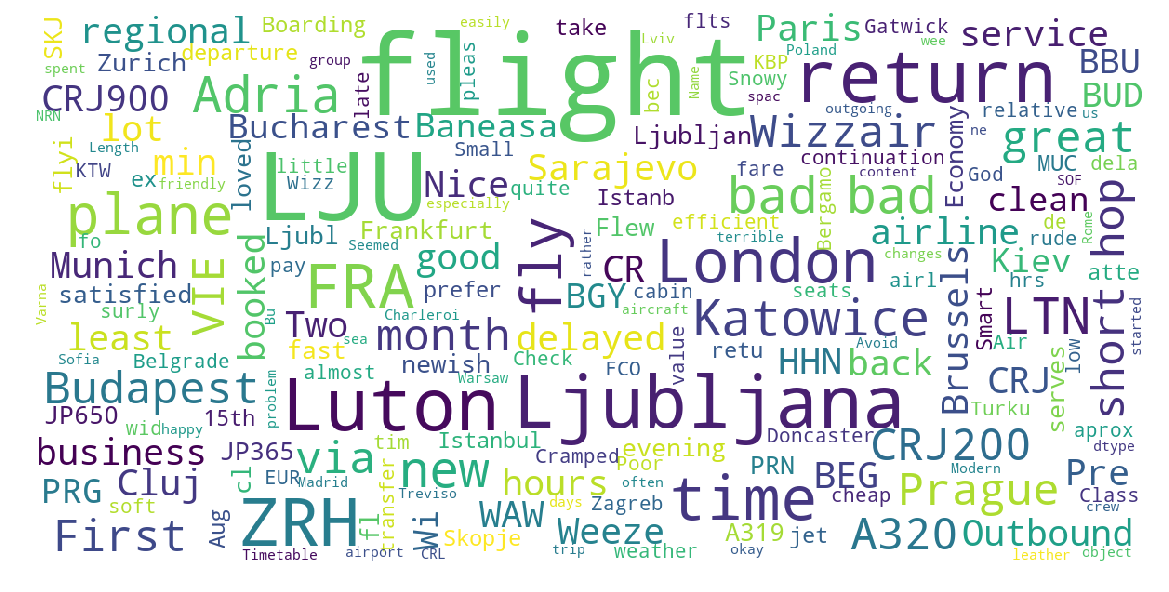

In [98]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(ds["content"])

In [35]:
ds

,airline_name,content,cabin_flown,overall_rating,type,content_clean
0,adria,Outbound flight FRA/PRN A319. 2 hours 10 min f...,Economy,7.0,1,outbound flight fra/prn hour min flight though...
1,adria,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,Business Class,10.0,1,two short hop zrh-lju lju-vie fast crj seat co...
2,adria,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,Economy,9.0,1,flew zurich-ljubljana newish flight almost ful...
3,adria,Adria serves this 100 min flight from Ljubljan...,Business Class,8.0,1,adria serve min flight ljubljana amsterdam bra...
4,adria,WAW-SKJ Economy.bad bad bad bad bad . not good...,Economy,4.0,0,waw-skj economy.bad bad bad bad bad good.not g...
5,adria,Sarajevo-Frankfurt via Ljubljana. I loved flyi...,Economy,9.0,1,sarajevo-frankfurt via ljubljana love fly smal...
6,adria,I had flights from Paris to Sarajevo via Ljubl...,Economy,5.0,1,flight paris sarajevo via ljubljana adria airw...
7,adria,LJU to FRA and back both flights were on time....,Economy,9.0,1,lju fra back flights time flight make nextgen ...
8,adria,On my Ljubljana - Munich flight in business cl...,Business Class,8.0,1,ljubljana munich flight business class adria u...
9,adria,Flights from LJU to ZRH and back all on time. ...,Economy,10.0,1,flight lju zrh back time economy class serve c...


In [36]:
# add number of characters column
ds["nb_chars"] = ds["content"].apply(lambda x: len(x))

# add number of words column
ds["nb_words"] = ds["content"].apply(lambda x: len(x.split(" ")))

# highest positive sentiment reviews (with more than 5 words)
ds[ds["nb_words"] >= 5].sort_values("pos", ascending = False)[["content", "pos"]].head(10)

# lowest negative sentiment reviews (with more than 5 words)
ds[ds["nb_words"] >= 5].sort_values("neg", ascending = False)[["content", "neg"]].head(10)

In [37]:
ds.head()

,airline_name,content,cabin_flown,overall_rating,type,content_clean,nb_chars,nb_words
0,adria,Outbound flight FRA/PRN A319. 2 hours 10 min f...,Economy,7.0,1,outbound flight fra/prn hour min flight though...,424,69
1,adria,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,Business Class,10.0,1,two short hop zrh-lju lju-vie fast crj seat co...,141,25
2,adria,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,Economy,9.0,1,flew zurich-ljubljana newish flight almost ful...,249,41
3,adria,Adria serves this 100 min flight from Ljubljan...,Business Class,8.0,1,adria serve min flight ljubljana amsterdam bra...,439,77
4,adria,WAW-SKJ Economy.bad bad bad bad bad . not good...,Economy,4.0,0,waw-skj economy.bad bad bad bad bad good.not g...,1286,198


In [38]:
ds['type'].value_counts()

1    22098
0    19298
Name: type, dtype: int64

In [39]:
a=22098
b=19298

In [40]:
import matplotlib.pyplot as plt

In [41]:
x1=1
x2=4

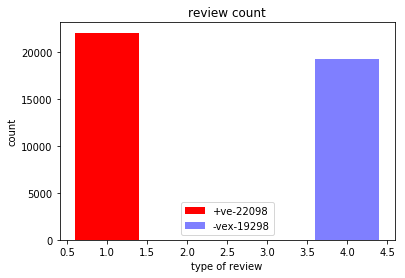

In [42]:
plt.bar(x1,a,label="+ve-22098",color="red")# School--1
plt.bar(x2,b,label="-vex-19298",color="blue",alpha=0.5)# School--2
plt.xlabel("type of review")
plt.ylabel("count")
plt.title("review count")
plt.legend()
plt.show()